In [6]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [7]:
geral_df = pd.read_excel('filtered_cassini.xlsx')
atr_df = pd.read_excel('cassini_atr.xlsx')
wtr_df = pd.read_excel('cassini_wtr.xlsx')
obl_df = pd.read_excel('cassini_obl.xlsx')

df_vector = [geral_df, atr_df, wtr_df, obl_df]
name_vector = ['geral', 'atr', 'wtr', 'obl']
file_vector = ['filtered_cassini.xlsx', 'cassini_atr.xlsx', 'cassini_wtr.xlsx', 'cassini_obl.xlsx']

In [10]:
angles = geral_df['C_Ant_Axis_360'].values
magnitudes = geral_df['C_Ant_Ast'].values

input_features = np.vstack((angles, magnitudes)).T

angles = geral_df['C_Ant_Axis_360'].values.reshape(-1, 1)
magnitudes = geral_df['C_Ant_Ast'].values.reshape(-1, 1)

n_clusters_angles = 3 
kmeans_angles = KMeans(n_clusters=n_clusters_angles, random_state=42).fit(angles)
angle_labels = kmeans_angles.labels_

n_clusters_magnitudes = 3  
kmeans_magnitudes = KMeans(n_clusters=n_clusters_magnitudes, random_state=42).fit(magnitudes)
magnitude_labels = kmeans_magnitudes.labels_

geral_df['Angle_Cluster'] = angle_labels
geral_df['Magnitude_Cluster'] = magnitude_labels

/Users/constancacachim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/constancacachim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


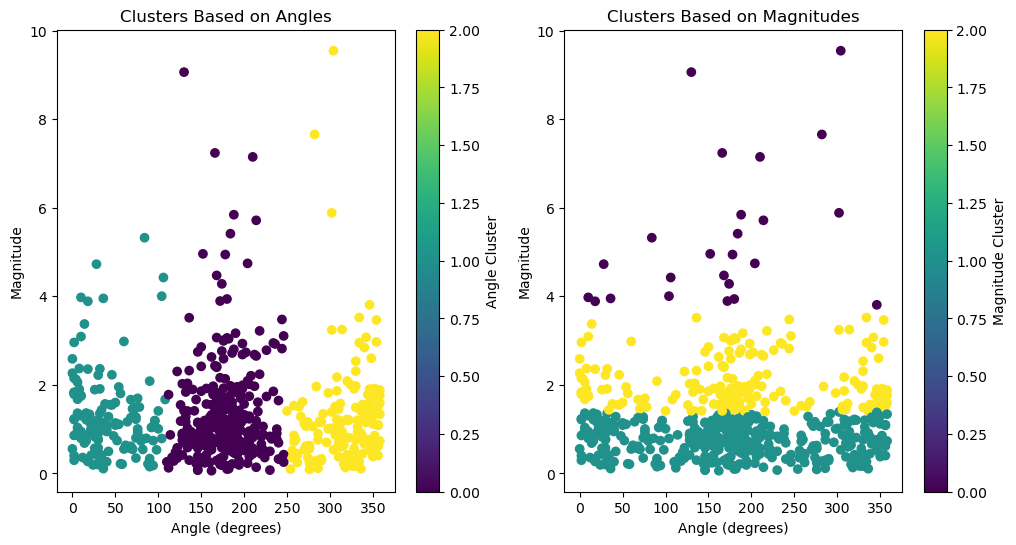

In [11]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(angles, magnitudes, c=angle_labels, cmap='viridis')
plt.xlabel('Angle (degrees)')
plt.ylabel('Magnitude')
plt.title('Clusters Based on Angles')
plt.colorbar(label='Angle Cluster')

# Visualize the clusters for magnitudes
plt.subplot(1, 2, 2)
plt.scatter(angles, magnitudes, c=magnitude_labels, cmap='viridis')
plt.xlabel('Angle (degrees)')
plt.ylabel('Magnitude')
plt.title('Clusters Based on Magnitudes')
plt.colorbar(label='Magnitude Cluster')

plt.show()